## Import Necessary Libraries and get data

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

## Show Examples

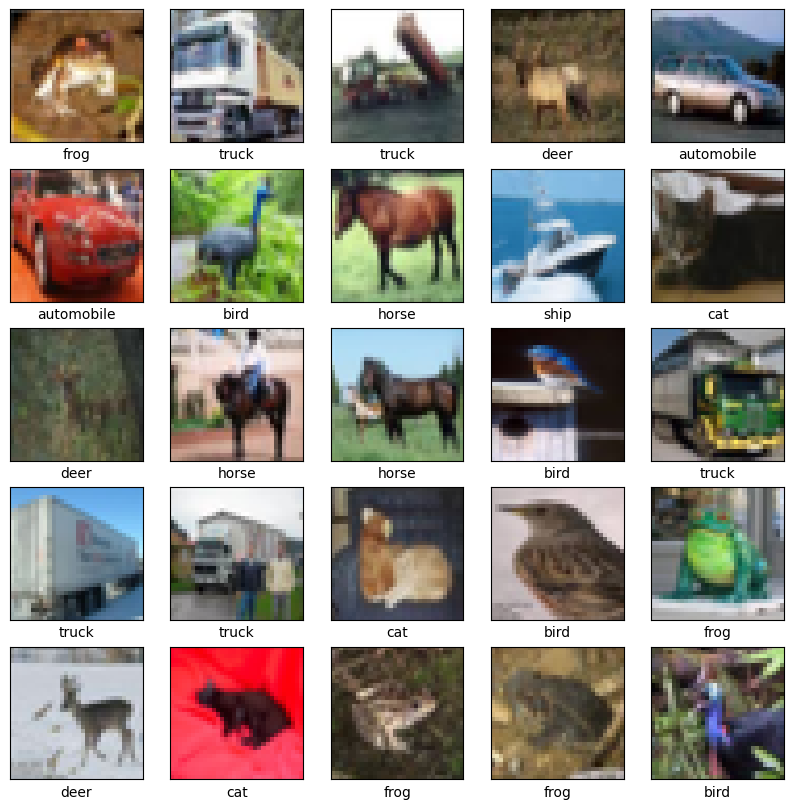

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Train a network (basic approach)

In [ ]:
#Crear el modelo
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#Compilar el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 10s 6ms/step - loss: 1.8740 - accuracy: 0.3231 - val_loss: 1.7411 - val_accuracy: 0.3811
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7193 - accuracy: 0.3867 - val_loss: 1.6715 - val_accuracy: 0.4067
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6583 - accuracy: 0.4051 - val_loss: 1.6950 - val_accuracy: 0.4024
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6242 - accuracy: 0.4204 - val_loss: 1.6207 - val_accuracy: 0.4206
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6006 - accuracy: 0.4253 - val_loss: 1.5980 - val_accuracy: 0.4224
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5750 - accuracy: 0.4345 - val_loss: 1.5556 - val_accuracy: 0.4430
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5608 - accuracy: 0.4430 - val_loss: 1.5801 - val_accuracy: 0.4392
E

### Metrics

<Figure size 640x480 with 0 Axes>

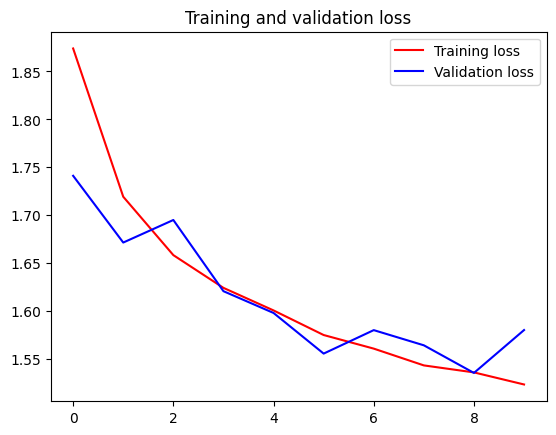

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 640x480 with 0 Axes>

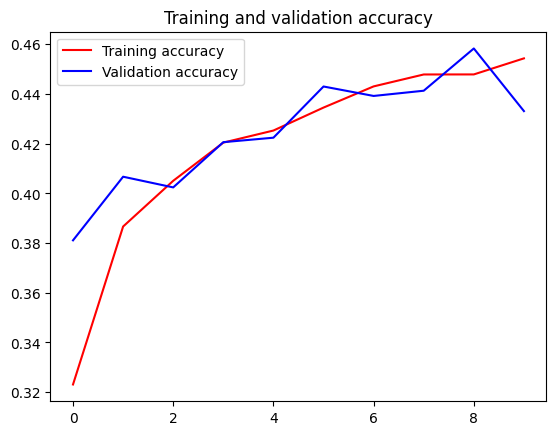

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.5802 - accuracy: 0.4331 - 621ms/epoch - 2ms/step
0.43309998512268066


## Train a Network (convolutional approach)

In [ ]:
# Crear el modelo de red convolucional
model = tf.keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(rate=0.25),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 84s 53ms/step - loss: 1.6242 - acc: 0.4085 - val_loss: 1.3212 - val_acc: 0.5263
Epoch 2/25
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2749 - acc: 0.5465 - val_loss: 1.1435 - val_acc: 0.5961
Epoch 3/25
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1436 - acc: 0.5982 - val_loss: 1.1763 - val_acc: 0.5858
Epoch 4/25
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0575 - acc: 0.6281 - val_loss: 0.9446 - val_acc: 0.6708
Epoch 5/25
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0090 - acc: 0.6471 - val_loss: 0.9307 - val_acc: 0.6796
Epoch 6/25
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9633 - acc: 0.6646 - val_loss: 0.8652 - val_acc: 0.6951
Epoch 7/25
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9426 - acc: 0.6732 - val_loss: 0.8989 - val_acc: 0.6817
Epoch 8/25
1563/1563 [==========================

### Metrics

<Figure size 640x480 with 0 Axes>

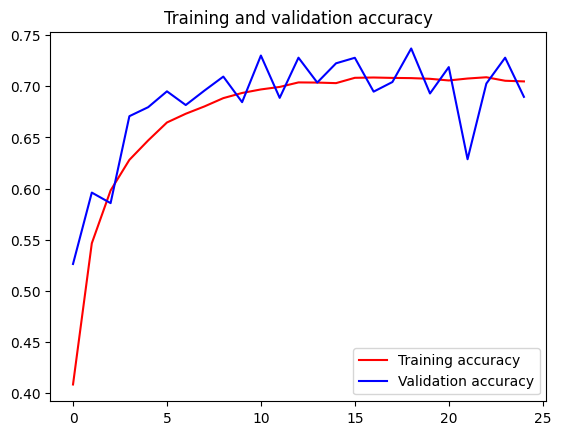

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

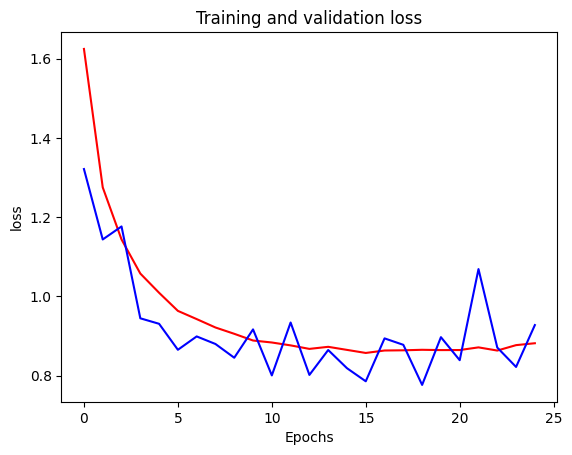

In [ ]:
# Plotear loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b' , label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8163 - acc: 0.7332 - 3s/epoch - 11ms/step
0.7332000136375427
